**Welcome**

Hello, guys!! You've come to the right page. This page gives you  an intuition about how a neural network actually functions and the code that is necessary to run it. Also, I feel that people are directly jumping into some of the deep learning frameworks and libraries such as** tensorflow**, **keras** and **caffe** without gaining an intuition and the steps in which they operate to solve a particular machine learning problem. The main purpose of this page creation is to provide the reader with right knowledge and the steps that a neural network algorithm takes to solve a particular problem.

In general, people use some of the deep learning libraries such as **tensorflow**, **keras** and **caffe** to name a few. What they don't realize is how these models work in the backend.** I've written the code from scratch** so that even a person who is new to machine learning and deep learning could get a sense as to how the algorithm functions and the flow of logic and the code.

In the code below, there are various functions included and their definitions given so that the reader can understand the block of code. As these functions are defined, they would later be called in the main function that executes the code overall. The former functions are called "helper functions" while the function that is used to execute these helper functions is called "master function" or "main function". 

We would go in a sequence of steps. We would first initialize the weights, apply forward propagation and load some of the constants in cache, apply back propagation and finally, update the parameters. Later, we would run the code in the main function and then design a prediction function that would take certain input parameters and give us an output as to whether a person would be admitted in a university or not.

By the way, this model that I've designed from scratch doesn't use some of the deep learning frameworks like **tensorfow** and** keras**. It was able to predict whether a person would be admitted to a university or not with **93% test accuracy**. And there were very few issues with either the overfitting or the underfitting. 

Let's get started in the machine learing project using **deep neural networks from scratch** without deep learning libraries such as tensorflow, keras and theano!!!!!!

In [1]:
import numpy as np                                 #importing the standard library for scientific calculation
import seaborn as sns                              #importing interative plotting library
import matplotlib.pyplot as plt                    #importing a plotting library
import pandas as pd                                #importing this library to read and store files
from sklearn.model_selection import train_test_split  #this is used to split the data into training and test set
from sklearn.metrics import classification_report, confusion_matrix   #These are some of the testing metrics we would be using in the course of our program

Here, we would basically define **relu** and** sigmoid** activation functions. In addition to this, we are also defining the **backward relu** and **sigmoid** functions that are used to compute the derivatives with respect to the cost while using back propagation. 

In [2]:
def sigmoid(Z):                                   #defining the sigmoid function that we would use in the later parts of the code
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1+np.exp(-Z))                          #This is the definition of sigmoid function
    cache = Z                                     #Storing some values in cache which could be used in back propagation later
    
    return A, cache                               #Returning the cache and the activation A

def relu(Z):                                      #Defining relu function that is used in various layers
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)                         #Definition of relu
    
    assert(A.shape == Z.shape)                  #Ensuring that the shape stays consistent
    
    cache = Z                                   #storing the value Z in cache which would later be used in deep neural networks
    return A, cache                             #returning the value of cache and activation


def relu_backward(dA, cache):                   #This is used for taking the derivatives of relu while using back propagation
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache                                  #Storing the values in cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object. 
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):      #This is used for sigmoid backward function and in backpropagation
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache 
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)                 #This is the derivative which would later be returned
    
    assert (dZ.shape == Z.shape)        #Ensuring that the shape stays consistent
    
    return dZ



Now, I would be importing the data and store it in df. This consists of the** Graduate Admissions File**.

In [3]:
df = pd.read_csv('../input/Admission_Predict_Ver1.1.csv')

Here, we would be looking at the first 5 rows to get an idea about the data set and understand it much better.

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Having a look at various columns that are necessary and understanding the dataset better.

In [5]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

We would be counting the number of students with various university ratings i.e. the ratings in which the students have pursued their studies. By looking at the result below, we can conclude that very few students have actually pursued their education in top - tier universities. A whole lot of students have their education in tier - 3 universities. 

In [6]:
df['University Rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

Let us also count the number of students with gradings on their SOP. From the result, we can see that most of the students got a score of about 4.0 in their SOP. Apart from this, 6 students got an SOP score of 1.0 which is quite rare in general. The average case would be for the students who got around 4.5. Wow!! That means most of the students are perfect in writing the SOPs.

In [7]:
df['SOP'].value_counts()

4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: SOP, dtype: int64

We will also be plotting a distribution plot. It would give us a rough estimate as to how the data is spread. We use seaborn in this example to get an intutive sense of how the data is spread.
As can be seen from the graph, most of the students have a score range between 3.5 and 4. In addition, the students who have a score of 4.5 in their SOP are also relatively high. 

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


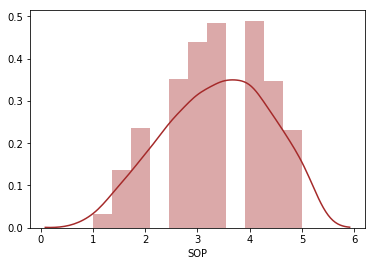

In [8]:
sns.color_palette("Paired")
sns.distplot(df['SOP'], color = 'brown')

We would also count the number of students with various LOR (Letter of recommendation) scores. We can see from the data below that there are a whole lot of students having a score of 3.0 in their LORs respectively. Apart from this, there are quite a lot of people who have 5.0 in their LORs which is brilliant. Based on this, we can conclude that most of the students have 5.0 in their LORs and 4.5 in their SOPs. That means these students must be brilliant. 

In [9]:
df['LOR '].value_counts()

3.0    99
4.0    94
3.5    86
4.5    63
5.0    50
2.5    50
2.0    46
1.5    11
1.0     1
Name: LOR , dtype: int64

We would also plot  the distribution plot for these graphs. We would see how the information is spread about the mean and identify the outliers in the data. 
We can easily observe from the data that there is onle a single student who has an LOR score of 1.0 who is an outlier. In addition to this, looking at the far end of the spectrum, we find that there are quite a lot of students who have an LOR score of 5.0 

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


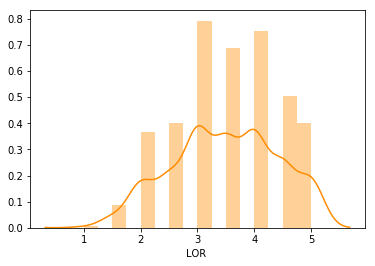

In [10]:
sns.distplot(df['LOR '], color = 'darkorange')

This just gives a representation of the last five rows of the dataset.

In [11]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


We would also plot a barplot to understand the relationship between the data. We take on the x-axis 'Research' column while on the y-axis 'GRE Score' to see the spread. All of these are drawn from seaborn (an interactive library to give plots).

We see from the plot that those who did research during their undergraduation were actually able to score above 300 on the GRE as compared to those who didn't do research. This would slighty give us an idea that those who do research would generally be able to score well on the GRE (in most of the cases but not all). 

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


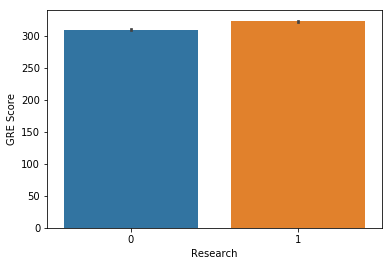

In [12]:
sns.barplot(x = 'Research', y = 'GRE Score', data = df)

We would also use joint plot from seaborn to look at the visualization. It clearly shows that as the 'GRE Score' increases, there is also an increase in the 'TOEFL Score'. There might be some outliers like a person scoring a 290 on the GRE but getting a 105 (approx) on the TOEFL. But those exceptions are rare. The output is pretty much a straight like mostly with some outliers in between. 

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


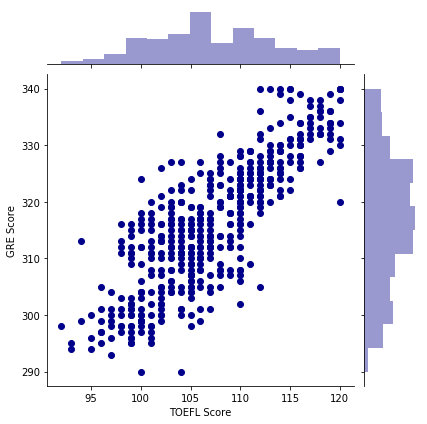

In [13]:
sns.jointplot(x = 'TOEFL Score', y = 'GRE Score', color = 'darkblue', data = df)

Here, I've plotted a kde plot which shows the density of the dataset. The darker the region, the more dense is the data present at those points. What it means is most of the data that is given is concentrated at that region. For example, when we look at the first dark circle (sort of), we can say that most of the students scored between 310 - 315 on the GRE and 105 - 110 on the TOEFL. The similar result is true for the other dark region. If the region is light, it means that there is not much data available for those points. 

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


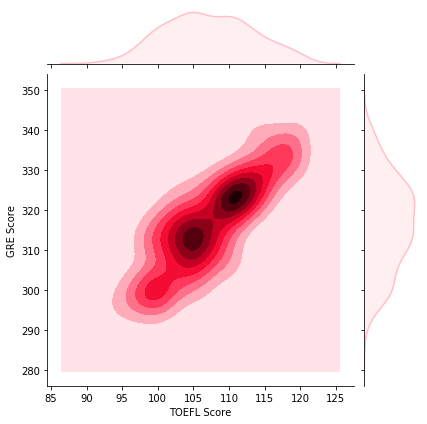

In [14]:
sns.jointplot(x = 'TOEFL Score', y = 'GRE Score', kind = 'kde', data = df, color = 'pink')

The below plot is a hex plot that shows relationship between 'CGPA' on the x-axis and 'GRE Score' on the y-axis. There is clearly a linear trend when we look at the plot. As the CGPA increases, the higher would be the GRE Score (most of the cases). Similar to a kde plot, the darker the region, more is the density of the data points given in the data set. Most of the students present in the dataset scored somewhere around 320 on the GRE and have a CGPA of 8.8. Additionally, there are a very few students who scored between 290 and 300 and then, got a 7.5 CGPA.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


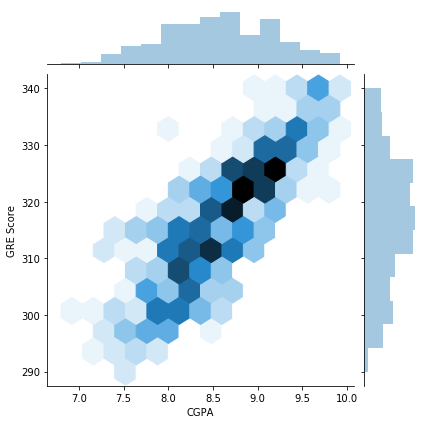

In [15]:
sns.jointplot(x = 'CGPA', y = 'GRE Score', kind = 'hex', data = df)

We see a green line from the start to the finish. This is a regression plot; this plot gives an approximate relationship between the parameters on the x-axis and the y-axis.As we can see, there is a linear relationship between the independant and dependant variable. 

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


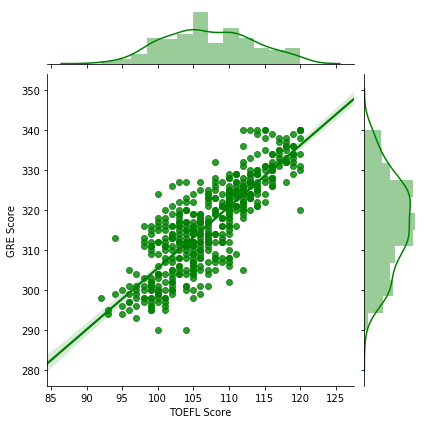

In [16]:
sns.jointplot(x = 'TOEFL Score', y = 'GRE Score', kind = 'reg', data = df, color = 'g')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


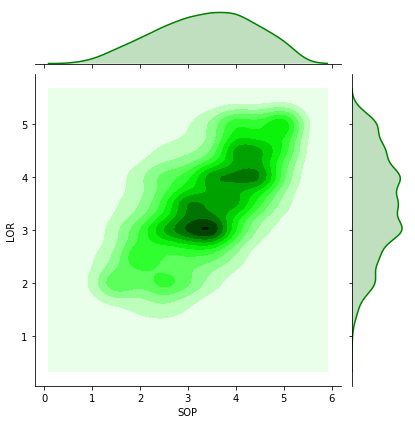

In [17]:
sns.jointplot(x = 'SOP', y = 'LOR ', kind = 'kde', color = 'g', data = df)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


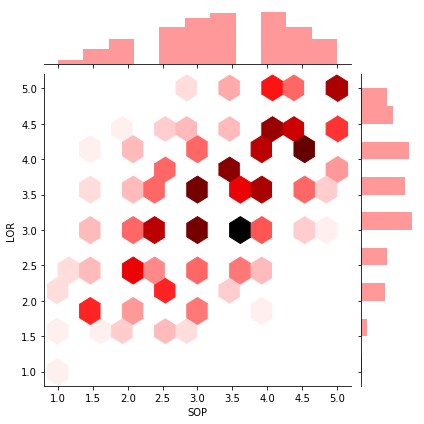

In [18]:
sns.jointplot(x = 'SOP', y = 'LOR ', kind = 'hex', color = 'r', data = df)

In [19]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [20]:
X = df.drop(['Chance of Admit ', 'Serial No.'], axis = 1) #here we would drop the columns that are not necessary for the input such as the serial number and chance of admit
y = df['Chance of Admit ']                                #we would just require the ouput to be Chance of Admit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 101)  #we are dividing the input along with the output into training and testing set
X_train = X_train.T                                  #We take the transpose of the training set for simplicity
X_test = X_test.T                                    #We take the transpose of the testing set for simplicity
y_train = y_train[:, np.newaxis]                     #We want to convert it into a n-dimensional vector
y_test = y_test[:, np.newaxis]                       #We convert it to n-dimensional vector
y_train = y_train.T                                  #We take the transpose for simplicity
y_test = y_test.T                                    #We take the transpose for simplicity
y = y[:, np.newaxis]
X = X.T                                              #We take the transpose for simplicity
y = y.T                                              #We take the transpose for simplicity
print('the shape of the input is {}'.format(X.shape))    #here we would print the shape of the input
print('the shape of the output is {}'.format(y.shape))   #printing the shape of the output
print('the shape of the input training set is {}'.format(X_train.shape))  #printing the shape of input training set
print('the shape of the output training set is {}'.format(y_train.shape)) #printing the shape of output training set
print('the shape of the input training set is {}'.format(X_test.shape))   #printing the shape of input testing set
print('the shape of the output training set is {}'.format(y_test.shape))  #printing the shape of output testing set

the shape of the input is (7, 500)
the shape of the output is (1, 500)
the shape of the input training set is (7, 335)
the shape of the output training set is (1, 335)
the shape of the input training set is (7, 165)
the shape of the output training set is (1, 165)


In [21]:
def initialize_parameters(n_x, n_h, n_y):     #this is a function used to initialize the weights and biases
    w1 = np.random.randn(n_h, n_x) * 0.01     #we use xavier initialization in this process 
    b1 = np.zeros((n_h, 1))                   #we create an array of zeroes
    w2 = np.random.randn(n_y, n_h) * 0.01     #we use xavier initialization in this process
    b2 = np.zeros((n_y, 1))                   #we create an array of zeroes
    parameters = {"w1": w1, "b1": b1, "w2": w2, "b2": b2}  #we load these parameters into a dictionary so that they can be used later
    return parameters                         #we return the parameters to the function 

In [22]:
def initialize_parameters_deep(layer_dims):   #This function is used to create weights and biases for all the L layers in the neural network
    L = len(layer_dims)                       #We take the dimensions of the input in the function
    parameters = {}                           #We create an empty dictionary so that it could be accessed later in the function
    for l in range(1, L):                     #We create a for loop to iterate through all the layers
        parameters['w' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l - 1]) * 0.01  #We use xavier initialization for all the L-layers
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))                              #We create zeroes for the L-layer network
    return parameters                         #We return the parameters

In [23]:
def linear_forward(a, w, b):  #We propagate forward through the network in this function
    z = np.dot(w, a) + b      #We take the dot product between the weight and the activation and add a bias to it
    cache = (a, w, b)         #We store all these values in cache so that they could be accessed later
    return z, cache           #We return these parameters to the function

In [24]:
def linear_activation_forward(a_prev, w, b, activation): #We create this function to calculate both the linear part and also the activation parts in the network
    if activation == "sigmoid":                          #If the activation is sigmiod, we process the information using sigmoid
        z, linear_cache = linear_forward(a_prev, w, b)   #We save the ouput in z and linear_cache
        a, activation_cache = sigmoid(z)                 #We then apply the sigmoid to z to produce activation a
    elif activation == "relu":                           #If the activation is relu, we process the information using relu
        z, linear_cache = linear_forward(a_prev, w, b)   #We save the ouput in z and linear_cache
        a, activation_cache = relu(z)                    #We then apply the relu to z to produce activation a
    cache = (linear_cache, activation_cache)             #We save both the linear cache and activation cache in cache that could later be used
    return a, cache                                      #We return both the activation and the cache

In [25]:
def L_model_forward(X, parameters):
    caches = []
    a = X
    L = len(parameters) // 2
    for l in range(1, L):
        a_prev = a
        a, cache = linear_activation_forward(a_prev, parameters['w' + str(l)], parameters['b' + str(l)], "relu")
        caches.append(cache)
    al, cache = linear_activation_forward(a, parameters['w' + str(L)], parameters['b' + str(L)], "sigmoid")
    caches.append(cache)
    return al, caches

In [26]:
def compute_cost(a, y):
    m = y.shape[1]
    cost = -(1 / m) * np.sum(y * np.log(a) + (1 - y) * np.log(1 - a))
    cost = np.squeeze(cost)
    return cost

In [27]:
def linear_backward(dz, cache):
    a_prev, w, b = cache
    m = a_prev.shape[1]
    dw = (1 / m) * np.dot(dz, a_prev.T)
    db = (1 / m) * np.sum(dz, axis = 1, keepdims = True)
    da_prev = np.dot(w.T, dz)
    return da_prev, dw, db

In [28]:
def linear_activation_backward(da, cache, activation):
    linear_cache, activation_cache = cache
    if activation == "relu":
        dz = relu_backward(da, activation_cache)
        da_prev, dw, db = linear_backward(dz, linear_cache)
    elif activation == "sigmoid":
        dz = sigmoid_backward(da, activation_cache)
        da_prev, dw, db = linear_backward(dz, linear_cache)
    return da_prev, dw, db
        

In [29]:
def L_model_backward(al, y, caches):
    grads = {}
    L = len(caches)
    m = al.shape[1]
    y = y.reshape(al.shape)
    dal = - (np.divide(y, al) - np.divide(1 - y, 1 - al))
    current_cache = caches[L - 1]
    grads["da" + str(L-1)], grads["dw" + str(L)], grads["db" + str(L)] = linear_activation_backward(dal, current_cache, activation = "sigmoid")
    for l in reversed(range(L - 1)):
        current_cache = caches[l]
        da_prev_temp, dw_temp, db_temp = linear_activation_backward(grads["da" + str(l + 1)], current_cache, activation = "relu")
        grads["da" + str(l)] = da_prev_temp
        grads["dw" + str(l + 1)] = dw_temp
        grads["db" + str(l + 1)] = db_temp
    return grads
    
    
    

In [30]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2
    for l in range(L):
        parameters["w" + str(l + 1)] = parameters["w" + str(l + 1)] - learning_rate * grads["dw" + str(l + 1)]
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * grads["db" + str(l + 1)]
    return parameters     

In [31]:
def two_layer_model(X, y, layers_dims, learning_rate = 0.001, num_iterations = 10000, print_cost = False):
    grads = {}
    costs = []
    m = X.shape[1]
    (n_x, n_h, n_y) = layers_dims
    parameters = initialize_parameters(n_x, n_h, n_y)
    w1 = parameters["w1"]
    b1 = parameters["b1"]
    w2 = parameters["w2"]
    b2 = parameters["b2"]
    for i in range(0, num_iterations):
        a1, cache1 = linear_activation_forward(X, w1, b1, activation = "relu")
        a2, cache2 = linear_activation_forward(a1, w2, b2, activation = "sigmoid")
        cost = compute_cost(a2, y)
        da2 = - (np.divide(y, a2) - np.divide(1 - y, 1 - a2))
        da1, dw2, db2 = linear_activation_backward(da2, cache2, activation = "sigmoid")
        da0, dw1, db1 = linear_activation_backward(da1, cache1, activation = "relu")
        grads["dw1"] = dw1
        grads["db1"] = db1
        grads["dw2"] = dw2
        grads["db2"] = db2
        parameters = update_parameters(parameters, grads, learning_rate)
        w1 = parameters["w1"]
        b1 = parameters["b1"]
        w2 = parameters["w2"]
        b2 = parameters["b2"]
        if print_cost and i % 1000 == 0:
            print("cost after iteration {}:: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    return parameters    

In [32]:
layers_dims = [X.shape[0], 50, 25, 1]

In [33]:
def L_layer_model(X, y, layers_dims, learning_rate = 0.03, num_iterations = 3000, print_cost = False):
    costs = []
    parameters = initialize_parameters_deep(layers_dims)
    for i in range(0, num_iterations):
        al, caches = L_model_forward(X, parameters)
        cost = compute_cost(al, y)
        grads = L_model_backward(al, y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()
    return parameters

Cost after iteration 0: 0.6918030394044355
Cost after iteration 1000: 0.5892328733642906
Cost after iteration 2000: 0.5884738835990682
Cost after iteration 3000: 0.5871504941952223
Cost after iteration 4000: 0.5855568218942181
Cost after iteration 5000: 0.5840069686245093
Cost after iteration 6000: 0.5825813158676274
Cost after iteration 7000: 0.5813033096286458
Cost after iteration 8000: 0.5801577711257774
Cost after iteration 9000: 0.5791704848485996
Cost after iteration 10000: 0.5783048076161343
Cost after iteration 11000: 0.5775343397140469
Cost after iteration 12000: 0.5768289401326852
Cost after iteration 13000: 0.5761390851709246
Cost after iteration 14000: 0.5755216347746036
Cost after iteration 15000: 0.5745105617740095
Cost after iteration 16000: 0.5743043218844157
Cost after iteration 17000: 0.5734904047525259
Cost after iteration 18000: 0.5729176545251956
Cost after iteration 19000: 0.572252025193032
Cost after iteration 20000: 0.5719138269605878
Cost after iteration 21000:

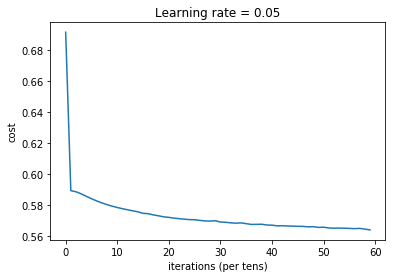

In [34]:
parameters = L_layer_model(X_train, y_train, layers_dims,learning_rate = 0.05, num_iterations = 60000, print_cost = True)

In [35]:
def predict(parameters, X):
    a2, cache = L_model_forward(X, parameters)
    predictions = a2
    return predictions

In [36]:
predictions_test = predict(parameters, X_test)
predictions_train = predict(parameters, X_train)
print('The accuracy of the training model: {}%'.format((1 - np.sum(np.abs(predictions_train - y_train))/predictions_train.shape[1]) * 100))
print('The accuracy of the testing model: {}%'.format((1 - np.sum(np.abs(predictions_test - y_test))/predictions_test.shape[1]) * 100))

The accuracy of the training model: 93.22101089765606%
The accuracy of the testing model: 92.89682359017365%


Finally, I've created a neural network model that would likely predict the chances of admission of a person based on some of the metrics like the** GRE Score, TOEFL Score, CGPA, University Rating and so on**. The model would predict it with **93 percent (approx) accuracy**. If you want to know your chances of admission, just use the "predict" function and input some of the metrics that are necessary for the algorithm to predict your chances of admission. Based on that, you could get a true and almost accurate estimate of whether you would be admitted in the university or not!!!